In [1]:
from sklearn.datasets import load_wine


In [2]:
wine = load_wine()

In [3]:
x=wine.data
y= wine.target
print(x.shape)

(178, 13)


In [5]:
print(x)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
import pandas as pd
df= pd.DataFrame(wine.data, columns= wine.feature_names)


In [8]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


steps to perform pca:
feature scaling and standardization
then select the best components after carefully analyzing
then apply transformation to the features


1. feature normalization or scaling:
By standardization: (aka z score)
converting multidimensional data to zero-mean unit-variance data by subtraction mean from each data and then dividing by its sigma
it can also be done by scaling to unit length by converting a full vector to a vector of size 1


In [10]:
from sklearn.preprocessing import StandardScaler
x_scaled= StandardScaler().fit_transform(x)

now x_scaled is the input for running pca algorithm
let's remember the fact that pca runs to scale down a multidimensional dataset to smaller dimensions by checking where correlations happen!!


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=None)
pca.fit(x_scaled)

PCA()

In [14]:
variance_ratio = pca.explained_variance_ratio_
cumulative_exp_var = np.cumsum(variance_ratio)

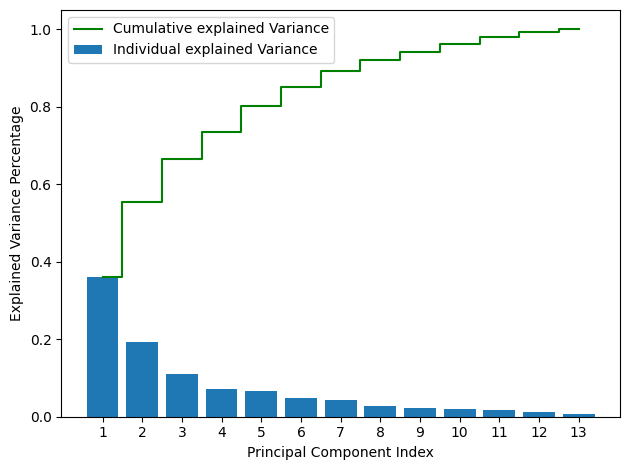

In [19]:
plt.bar(range(1,14),variance_ratio, align='center', label= 'Individual explained Variance')
plt.step(range(1,14), cumulative_exp_var, where='mid', label= 'Cumulative explained Variance', color='green')
plt.ylabel('Explained Variance Percentage')
plt.xlabel('Principal Component Index')
plt.xticks(ticks=list(range(1,14)))
plt.legend(loc='best')
plt.tight_layout()

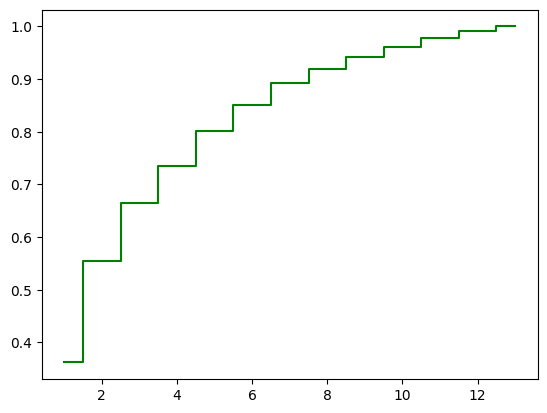

In [16]:
plt.step(range(1,14), cumulative_exp_var, where='mid', label= 'Cumulative explained Variance', color='green')

most of the variance is coming in from the first bunch of variables and last few are basically very less variance, i.e. we can tell that correlations are stepping up.
so we go right ahead and scale dataset down to first 7 variables instead


so now what we do is in the number of components of pca algorithm we take 6, i.e. n_components= 7, so that our algorithm can never take less than  7


In [20]:
pca = PCA(n_components=7)
x_pca= pca.fit_transform(x_scaled)

let's also remmeber when to use fit(x).transform(x) and fit_transform(x)

In [21]:
df= pd.DataFrame(x_pca)
df.head()

,0,1,2,3,4,5,6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074


In [22]:
print(x_pca.shape)

(178, 7)


we've gone from 13 variables to 7 variables